# About Dataset

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Spark

## Import Dataset

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()

raw_df = spark.read.csv('./data/credit_card_clients.csv', header=True)
raw_df.show(5)

22/11/30 09:19:42 WARN Utils: Your hostname, SnowdenAir.local resolves to a loopback address: 127.0.0.1; using 192.168.43.43 instead (on interface en0)
22/11/30 09:19:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/30 09:19:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/30 09:19:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+---+------+---+---+---+---+---+---+---+---+---+---+-----+-----+-----+-----+-----+-----+----+-----+-----+----+----+----+---+
| ID|    X1| X2| X3| X4| X5| X6| X7| X8| X9|X10|X11|  X12|  X13|  X14|  X15|  X16|  X17| X18|  X19|  X20| X21| X22| X23|  Y|
+---+------+---+---+---+---+---+---+---+---+---+---+-----+-----+-----+-----+-----+-----+----+-----+-----+----+----+----+---+
|  1| 20000|  2|  2|  1| 24|  2|  2| -1| -1| -2| -2| 3913| 3102|  689|    0|    0|    0|   0|  689|    0|   0|   0|   0|  1|
|  2|120000|  2|  2|  2| 26| -1|  2|  0|  0|  0|  2| 2682| 1725| 2682| 3272| 3455| 3261|   0| 1000| 1000|1000|   0|2000|  1|
|  3| 90000|  2|  2|  2| 34|  0|  0|  0|  0|  0|  0|29239|14027|13559|14331|14948|15549|1518| 1500| 1000|1000|1000|5000|  0|
|  4| 50000|  2|  2|  1| 37|  0|  0|  0|  0|  0|  0|46990|48233|49291|28314|28959|29547|2000| 2019| 1200|1100|1069|1000|  0|
|  5| 50000|  1|  2|  1| 57| -1|  0| -1|  0|  0|  0| 8617| 5670|35835|20940|19146|19131|2000|36681|10000|9000| 689| 679|  0|


## Data Preparation

In [2]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler

# change columns type 'str' to 'float' because VectorAssembler are not support to string type
raw_df = raw_df.select(*(col(c).cast("float").alias(c) for c in raw_df.columns))

# get columns name
numericCols = raw_df.drop('ID', 'Y').columns

# merge all feature columns to Vector
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")

va_df = assembler.transform(raw_df)

va_df.select(va_df.features, va_df.Y).show(5)

22/11/30 09:19:54 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------------------+---+
|            features|  Y|
+--------------------+---+
|[20000.0,2.0,2.0,...|1.0|
|[120000.0,2.0,2.0...|1.0|
|[90000.0,2.0,2.0,...|0.0|
|[50000.0,2.0,2.0,...|0.0|
|[50000.0,1.0,2.0,...|0.0|
+--------------------+---+
only showing top 5 rows



In [3]:
# train/test split
bs_train, bs_test = va_df.randomSplit([0.8, 0.2], seed=0)

train = bs_train.select(['features', 'Y'])
test = bs_test.select(['features', 'Y'])

## Models

----- RandomForestClassifier -----
Iteration: 1
Model Training Time in Seconds: 2.43
Model Prediction Time in Seconds: 0.04
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      7987
         1.0       0.36      0.69      0.47      1070

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.68      9057
weighted avg       0.88      0.82      0.84      9057



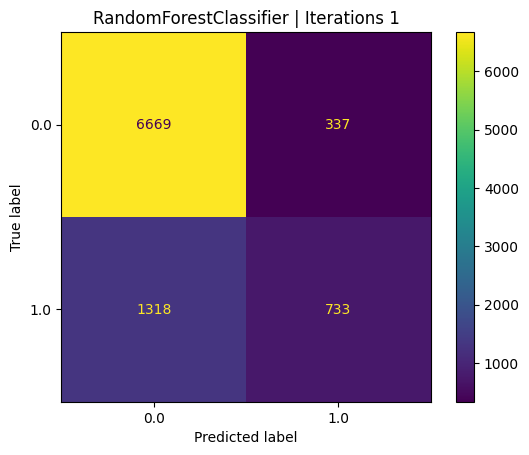

Iteration: 2
Model Training Time in Seconds: 2.39
Model Prediction Time in Seconds: 0.05
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      7987
         1.0       0.36      0.69      0.47      1070

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.68      9057
weighted avg       0.88      0.82      0.84      9057



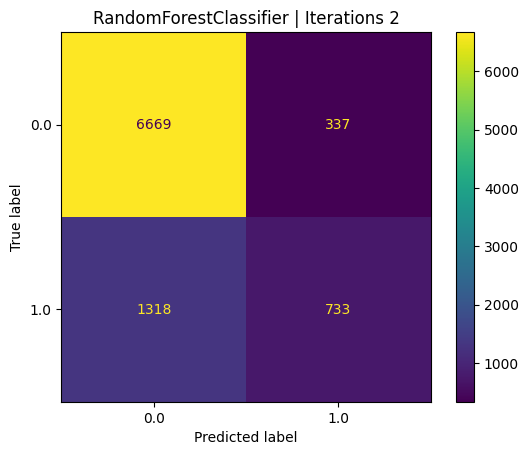

Iteration: 3
Model Training Time in Seconds: 2.34
Model Prediction Time in Seconds: 0.02
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      7987
         1.0       0.36      0.69      0.47      1070

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.68      9057
weighted avg       0.88      0.82      0.84      9057



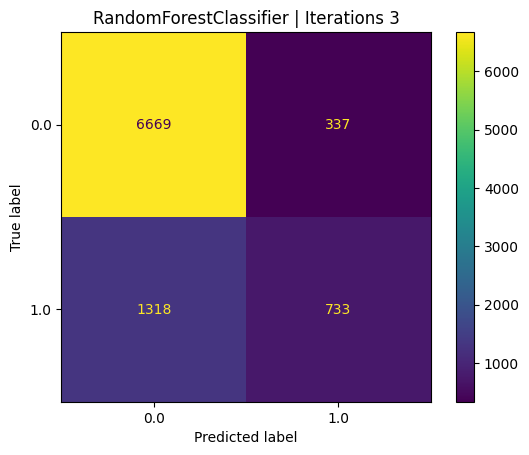

Iteration: 4
Model Training Time in Seconds: 2.52
Model Prediction Time in Seconds: 0.05
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      7987
         1.0       0.36      0.69      0.47      1070

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.68      9057
weighted avg       0.88      0.82      0.84      9057



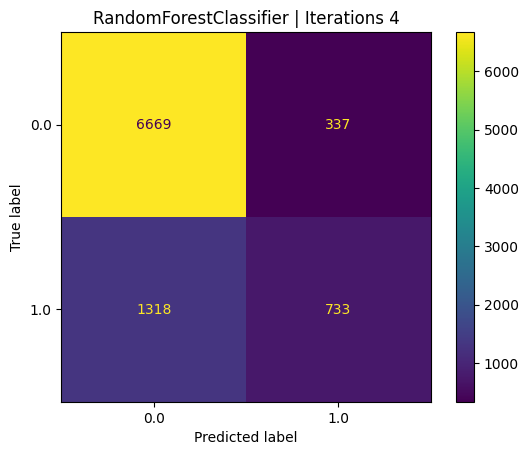

Iteration: 5
Model Training Time in Seconds: 2.17
Model Prediction Time in Seconds: 0.02
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      7987
         1.0       0.36      0.69      0.47      1070

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.68      9057
weighted avg       0.88      0.82      0.84      9057



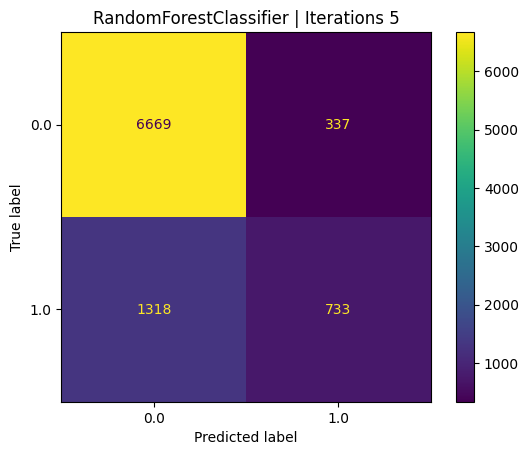

----- DecisionTreeClassifier -----
Iteration: 1
Model Training Time in Seconds: 1.91
Model Prediction Time in Seconds: 0.09
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8051
         1.0       0.34      0.69      0.45      1006

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.67      9057
weighted avg       0.89      0.82      0.84      9057



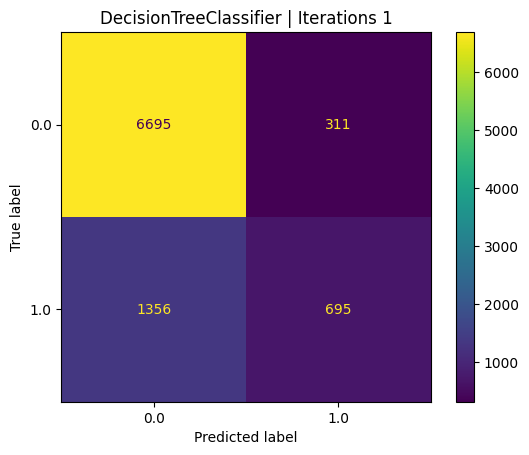

Iteration: 2
Model Training Time in Seconds: 1.75
Model Prediction Time in Seconds: 0.12
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8051
         1.0       0.34      0.69      0.45      1006

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.67      9057
weighted avg       0.89      0.82      0.84      9057



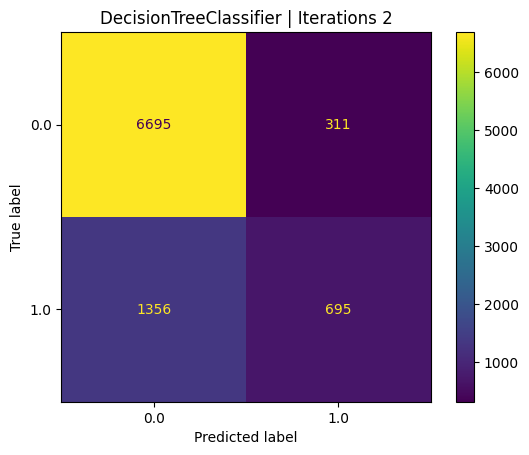

Iteration: 3
Model Training Time in Seconds: 1.70
Model Prediction Time in Seconds: 0.08
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8051
         1.0       0.34      0.69      0.45      1006

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.67      9057
weighted avg       0.89      0.82      0.84      9057



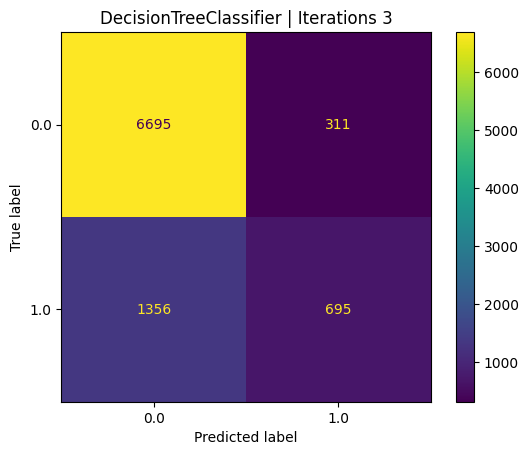

Iteration: 4
Model Training Time in Seconds: 1.65
Model Prediction Time in Seconds: 0.08
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8051
         1.0       0.34      0.69      0.45      1006

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.67      9057
weighted avg       0.89      0.82      0.84      9057



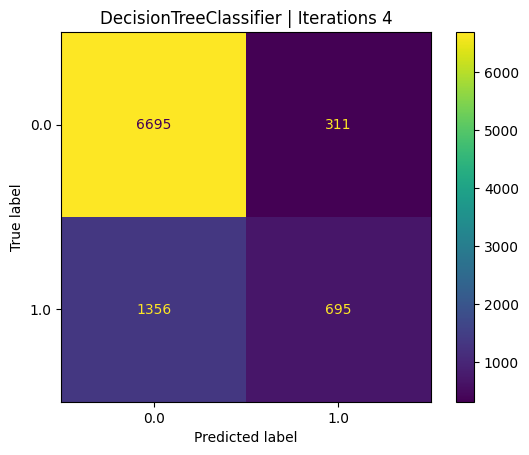

Iteration: 5
Model Training Time in Seconds: 1.83
Model Prediction Time in Seconds: 0.10
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      8051
         1.0       0.34      0.69      0.45      1006

    accuracy                           0.82      9057
   macro avg       0.65      0.76      0.67      9057
weighted avg       0.89      0.82      0.84      9057



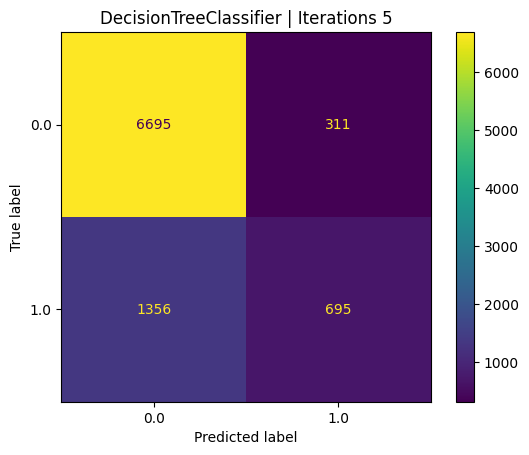

In [13]:
from pyspark.ml.classification import RandomForestClassifier, DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import time
import numpy as np

# Define model
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Y')
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Y')

models = [rf, dt]

for model in models:
    print(f'----- {type(model).__name__} -----')
    for i in range(5):
        print(f'Iteration: {i+1}')
        # Train the model
        model_training_start_time = time.perf_counter()
        temp_model = model.fit(train)
        model_training_elapsed_time =  time.perf_counter() - model_training_start_time 
        print(f'Model Training Time in Seconds: {model_training_elapsed_time:.2f}')

        # Prediction
        model_prediction_start_time = time.perf_counter()
        pred = temp_model.transform(test)
        model_prediction_elapsed_time = time.perf_counter() - model_prediction_start_time
        print(f'Model Prediction Time in Seconds: {model_prediction_elapsed_time:.2f}')

        y_test = np.array(pred.select('Y').collect())
        y_pred = np.array(pred.select('prediction').collect())

        print(classification_report(y_pred, y_test))

        print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
        plt.title(f'{type(model).__name__} | Iterations {i+1}')
        plt.show()